In [ ]:
import pandas as pd
# news_df, report_df 불러오기
news_df = pd.read_csv('/news_2023_2025.csv')
report_df = pd.read_csv('/report_2023_2025.csv')

In [ ]:
len(news_df)

58405

In [ ]:
news_df.head()

,news_id,wdate,title,article,press,url,image
0,20250523_0001,2025-05-23 19:11,[마켓인]모태펀드 존속 불확실성 해소될까…이재명 공약에 업계 주목,"2035년 종료 앞둬, 존속 공약에 기대감\n창업 초기자금 공백 완화 가능성에 업계...",이데일리,https://n.news.naver.com/mnews/article/018/000...,https://imgnews.pstatic.net/image/018/2025/05/...
1,20250523_0002,2025-05-23 18:52,"[단독] 카카오페이, 2500만 회원 쓱·스마일페이 품나…간편결제 시장 빅3 경쟁 후끈",매각가 5000억 안팎 달할듯\n결제시장 내 입지강화 포석\n카카오페이 [사진 = ...,매일경제,https://n.news.naver.com/mnews/article/009/000...,https://imgnews.pstatic.net/image/009/2025/05/...
2,20250523_0003,2025-05-23 18:38,"키스트론, 일반 청약 흥행…증거금 6조원 모았다","5월22~23일 청약 진행, 경쟁률 총2166대1\n상장 후 예상 시가총개 643억...",머니투데이,https://n.news.naver.com/mnews/article/008/000...,https://imgnews.pstatic.net/image/008/2025/05/...
3,20250523_0004,2025-05-23 18:33,"골드만삭스 차기 CEO, 이재용·김병주·이창용 만났다",[사진=연합뉴스]\n세계 2위 투자은행(IB)인 골드만삭스의 사장 겸 최고운영책임자...,매일경제,https://n.news.naver.com/mnews/article/009/000...,https://imgnews.pstatic.net/image/009/2025/05/...
4,20250523_0005,2025-05-23 18:24,흔들리는 미국…달러 패권 붕괴에 '스테이블코인' 선택한 美,/사진=게티이미지뱅크\n미국 정부가 달러의 기축통화 지위를 위협하는 금에 대응하기 ...,머니투데이,https://n.news.naver.com/mnews/article/008/000...,https://imgnews.pstatic.net/image/008/2025/05/...


In [ ]:
len(report_df)

17310

In [ ]:
report_df.head()

,report_id,종목명,제목,증권사,작성일,조회수,URL,본문,목표가,투자의견
0,20250523_0001,메디젠휴먼케어,유전체 분석 기반의 정밀의료 전문기업,NICE평가정보,2025-05-23,318,https://finance.naver.com/research/company_rea...,■ 유전체 분석 기반의 정밀의료 전문기업\n■ 원천기술 기반의 데이터 해석 정확도 ...,NaN,없음
1,20250523_0002,HD현대중공업,"P, Q, C 완벽한 삼각형",대신증권,2025-05-23,617,https://finance.naver.com/research/company_rea...,"신규수주는 꾸준히 올라오는 중\n025년 5월 누계 기준, HD현대중공업의 신규수주...","450,000",Buy
2,20250523_0003,빛샘전자,"전자, 통신 부품 전문기업",NICE평가정보,2025-05-23,317,https://finance.naver.com/research/company_rea...,■ LED 및 광통신 부문 기반의 안정적 수익구조\n■ 지속적인 연구 및 기술개발을...,NaN,없음
3,20250523_0004,삼성바이오로직스,2개사 합산 적정 기업가치 약 97.2조원,DS투자증권,2025-05-23,1178,https://finance.naver.com/research/company_rea...,"인적 분할 결정, 분할 비율 약 6.5:3.5\n5월 22일 삼성바이오로직스는 인적...","1,300,000",매수
4,20250523_0005,농심,라면으로 화끈하게 밸류업,DS투자증권,2025-05-23,738,https://finance.naver.com/research/company_rea...,기업가치 제고 계획 발표\n전일(5/22) 농심은 기업가치 제고 계획을 공시했다. ...,"540,000",매수


In [ ]:
pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("snunlp/KR-SBERT-V40K-klueNLI-augSTS")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# 임베딩
news_emb = model.encode(news_df['article'].tolist(), batch_size=64, show_progress_bar=True)
report_emb = model.encode(report_df['본문'].tolist(), batch_size=64, show_progress_bar=True)

# DataFrame에 embedding 컬럼으로 저장 (각 row에 np.ndarray 또는 list)
import numpy as np

news_df['embedding'] = list(news_emb)
report_df['embedding'] = list(report_emb)

Batches:   0%|          | 0/913 [00:00<?, ?it/s]

Batches:   0%|          | 0/271 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from tqdm import tqdm
import pandas as pd

# 1. embedding matrix 추출
news_emb = np.stack(news_df['embedding'].values)
report_emb = np.stack(report_df['embedding'].values)

# 2. 코사인 유사도 계산
cos_sim = cosine_similarity(news_emb, report_emb)  # shape: (num_news, num_report)

# 3. 매칭 (유사도 기준, 날짜 기준 없이 상위 20개만)
all_matches = []

In [ ]:
for i in tqdm(range(len(news_df))):
    sims = cos_sim[i]
    top20_idx = np.argsort(sims)[::-1][:20]
    for j in top20_idx:
        sim = sims[j]
        all_matches.append({
            'news_id': news_df.iloc[i]['news_id'],
            'wdate': news_df.iloc[i]['wdate'],
            'news_title': news_df.iloc[i]['title'],
            'news_content': news_df.iloc[i]['article'],
            'report_id': report_df.iloc[j]['report_id'],
            '작성일': report_df.iloc[j]['작성일'],
            'report_title': report_df.iloc[j]['제목'],
            'report_content': report_df.iloc[j]['본문'],
            'sim': sim
        })

result_df = pd.DataFrame(all_matches)

100%|██████████| 58405/58405 [06:16<00:00, 155.09it/s]


In [ ]:
# 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

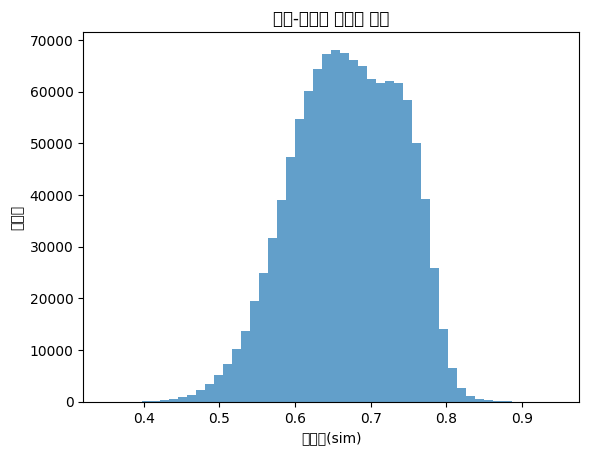

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.hist(result_df['sim'], bins=50, alpha=0.7)
plt.xlabel("유사도(sim)")
plt.ylabel("빈도수")
plt.title("뉴스-리포트 유사도 분포")
plt.show()


In [ ]:
result_df['wdate'] = pd.to_datetime(result_df['wdate'])
result_df['작성일'] = pd.to_datetime(result_df['작성일'])

In [ ]:
result_df.head()

,news_id,wdate,news_title,news_content,report_id,작성일,report_title,report_content,sim
0,20250523_0001,2025-05-23 19:11:00,[마켓인]모태펀드 존속 불확실성 해소될까…이재명 공약에 업계 주목,"2035년 종료 앞둬, 존속 공약에 기대감\n창업 초기자금 공백 완화 가능성에 업계...",20250318_0011,2025-03-18,"깔끔하게 털고, 이제 게임 ON",비핵심 사업 효율화 및 경영 구조 개선 마무리\n카카오게임즈는 비핵심 사업 정리를 ...,0.723534
1,20250523_0001,2025-05-23 19:11:00,[마켓인]모태펀드 존속 불확실성 해소될까…이재명 공약에 업계 주목,"2035년 종료 앞둬, 존속 공약에 기대감\n창업 초기자금 공백 완화 가능성에 업계...",20241029_0037,2024-10-29,실적 아쉬움을 달래준 수주,"투자의견 매수, 목표주가 54,000원 유지\nTP 5.4만원은 2024~25년 E...",0.702815
2,20250523_0001,2025-05-23 19:11:00,[마켓인]모태펀드 존속 불확실성 해소될까…이재명 공약에 업계 주목,"2035년 종료 앞둬, 존속 공약에 기대감\n창업 초기자금 공백 완화 가능성에 업계...",20230704_0007,2023-07-04,붉은 사막 기대감 다시 한 번,"투자의견 매수 유지, 목표주가 61,000원으로 기존 대비 22% 상향\n2024년...",0.702610
3,20250523_0001,2025-05-23 19:11:00,[마켓인]모태펀드 존속 불확실성 해소될까…이재명 공약에 업계 주목,"2035년 종료 앞둬, 존속 공약에 기대감\n창업 초기자금 공백 완화 가능성에 업계...",20231207_0005,2023-12-07,블랙핑크 전원 재계약,2024년 예상 P/E 18배\n산업의 본질적인 리스크 중 하나인 인적 리스크가 너...,0.696131
4,20250523_0001,2025-05-23 19:11:00,[마켓인]모태펀드 존속 불확실성 해소될까…이재명 공약에 업계 주목,"2035년 종료 앞둬, 존속 공약에 기대감\n창업 초기자금 공백 완화 가능성에 업계...",20240516_0075,2024-05-16,NDR 후기: 아이게이밍과 주주환원에 집중,"NDR 후기: 아이게이밍 사업, 주주환원, 신작 모멘텀\n더블유게임즈는 5/13,1...",0.690694


In [ ]:
print(result_df['wdate'].dtype)

datetime64[ns]


In [ ]:
result_df['date_diff_days'] = (result_df['wdate'] - result_df['작성일']).dt.days

In [ ]:
result_df.head()

,news_id,wdate,news_title,news_content,report_id,작성일,report_title,report_content,sim,date_diff_days
0,20250523_0001,2025-05-23 19:11:00,[마켓인]모태펀드 존속 불확실성 해소될까…이재명 공약에 업계 주목,"2035년 종료 앞둬, 존속 공약에 기대감\n창업 초기자금 공백 완화 가능성에 업계...",20250318_0011,2025-03-18,"깔끔하게 털고, 이제 게임 ON",비핵심 사업 효율화 및 경영 구조 개선 마무리\n카카오게임즈는 비핵심 사업 정리를 ...,0.723534,66
1,20250523_0001,2025-05-23 19:11:00,[마켓인]모태펀드 존속 불확실성 해소될까…이재명 공약에 업계 주목,"2035년 종료 앞둬, 존속 공약에 기대감\n창업 초기자금 공백 완화 가능성에 업계...",20241029_0037,2024-10-29,실적 아쉬움을 달래준 수주,"투자의견 매수, 목표주가 54,000원 유지\nTP 5.4만원은 2024~25년 E...",0.702815,206
2,20250523_0001,2025-05-23 19:11:00,[마켓인]모태펀드 존속 불확실성 해소될까…이재명 공약에 업계 주목,"2035년 종료 앞둬, 존속 공약에 기대감\n창업 초기자금 공백 완화 가능성에 업계...",20230704_0007,2023-07-04,붉은 사막 기대감 다시 한 번,"투자의견 매수 유지, 목표주가 61,000원으로 기존 대비 22% 상향\n2024년...",0.702610,689
3,20250523_0001,2025-05-23 19:11:00,[마켓인]모태펀드 존속 불확실성 해소될까…이재명 공약에 업계 주목,"2035년 종료 앞둬, 존속 공약에 기대감\n창업 초기자금 공백 완화 가능성에 업계...",20231207_0005,2023-12-07,블랙핑크 전원 재계약,2024년 예상 P/E 18배\n산업의 본질적인 리스크 중 하나인 인적 리스크가 너...,0.696131,533
4,20250523_0001,2025-05-23 19:11:00,[마켓인]모태펀드 존속 불확실성 해소될까…이재명 공약에 업계 주목,"2035년 종료 앞둬, 존속 공약에 기대감\n창업 초기자금 공백 완화 가능성에 업계...",20240516_0075,2024-05-16,NDR 후기: 아이게이밍과 주주환원에 집중,"NDR 후기: 아이게이밍 사업, 주주환원, 신작 모멘텀\n더블유게임즈는 5/13,1...",0.690694,372


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45684 (\N{HANGUL SYLLABLE NYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

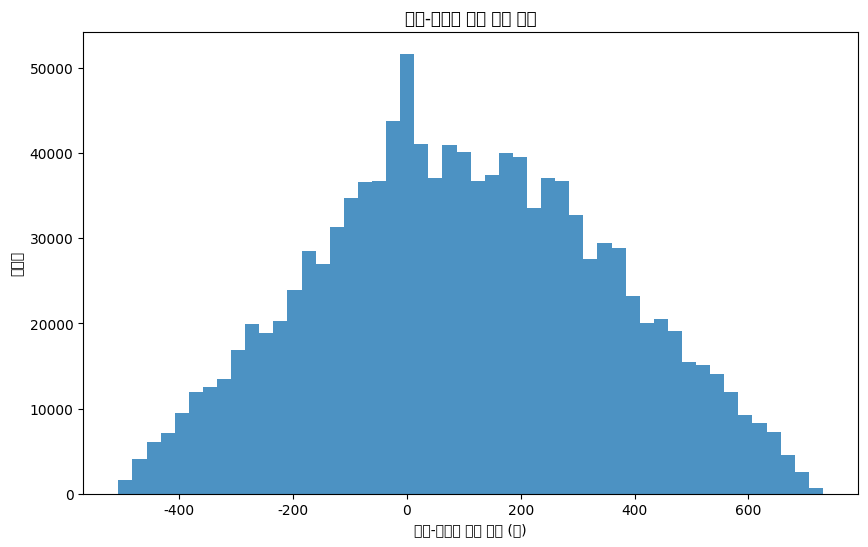

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,6))
plt.hist(result_df['date_diff_days'], bins=50, alpha=0.8)
plt.xlabel("뉴스-리포트 날짜 차이 (일)")
plt.ylabel("빈도수")
plt.title("뉴스-리포트 날짜 차이 분포")
plt.show()

In [ ]:
len(result_df)

1168100

In [ ]:
result_df.iloc[25000:25100]

,news_id,wdate,news_title,news_content,report_id,작성일,report_title,report_content,sim,date_diff_days
25000,20250515_0229,2025-05-15 07:40:00,"엔씨소프트, 본격적인 주가 상승은 아직…투자의견 ‘중립’-한국",[이데일리 박정수 기자] 한국투자증권은 15일 엔씨소프트(036570)에 대해 1분...,20230811_0073,2023-08-11,24년 이후 스토리도 필요,"2Q23 Review: 컨센서스 부합\n2분기 매출액 701억원(Flat YoY),...",0.821621,643
25001,20250515_0229,2025-05-15 07:40:00,"엔씨소프트, 본격적인 주가 상승은 아직…투자의견 ‘중립’-한국",[이데일리 박정수 기자] 한국투자증권은 15일 엔씨소프트(036570)에 대해 1분...,20250515_0050,2025-05-15,가이던스에 미치지 못할지언정,"- 1분기 매출액 3,603억원(-10%yoy), 영업이익 52억원(흑자전환yoy)...",0.821222,0
25002,20250515_0229,2025-05-15 07:40:00,"엔씨소프트, 본격적인 주가 상승은 아직…투자의견 ‘중립’-한국",[이데일리 박정수 기자] 한국투자증권은 15일 엔씨소프트(036570)에 대해 1분...,20240702_0005,2024-07-02,아직 크게 움직이기 어렵다,2Q24 실적은 영업이익 컨센서스 하회 추정\n동사의 2Q24 실적은 매출액 382...,0.819664,317
25003,20250515_0229,2025-05-15 07:40:00,"엔씨소프트, 본격적인 주가 상승은 아직…투자의견 ‘중립’-한국",[이데일리 박정수 기자] 한국투자증권은 15일 엔씨소프트(036570)에 대해 1분...,20230714_0010,2023-07-14,낮아진 기대치 속 반전기회를 모색,2분기 실적은 낮아진 시장 기대치 부합 추정\n동사의 2분기 실적으로 매출액 451...,0.808245,671
25004,20250515_0229,2025-05-15 07:40:00,"엔씨소프트, 본격적인 주가 상승은 아직…투자의견 ‘중립’-한국",[이데일리 박정수 기자] 한국투자증권은 15일 엔씨소프트(036570)에 대해 1분...,20230623_0004,2023-06-23,떨어진 타율을 올리는 것이 급선무,"2Q23 Preview: 영업적자 지속 전망\n넷마블 2분기 실적은 매출액 6,13...",0.803372,692
...,...,...,...,...,...,...,...,...,...,...
25095,20250515_0233,2025-05-15 07:30:00,"LIG넥스원, 구조적 수익성 개선 확인시 리레이팅 …목표가 25.7%↑-대신",[이데일리 원다연 기자] 대신증권은 15일 LIG넥스원(079550)에 대해 구조적...,20230608_0007,2023-06-08,"2Q 영업이익 상향, 여전히 매력적인 구간","투자의견 매수(BUY) 및 목표주가 380,000원 유지\n2023년 2분기 영업이...",0.768782,707
25096,20250515_0233,2025-05-15 07:30:00,"LIG넥스원, 구조적 수익성 개선 확인시 리레이팅 …목표가 25.7%↑-대신",[이데일리 원다연 기자] 대신증권은 15일 LIG넥스원(079550)에 대해 구조적...,20240426_0003,2024-04-26,1Q 이익은 예상 상회,"투자의견 시장수익률 유지, 목표주가 17,000원 상향(21.4%)\n2024년 1...",0.767874,384
25097,20250515_0233,2025-05-15 07:30:00,"LIG넥스원, 구조적 수익성 개선 확인시 리레이팅 …목표가 25.7%↑-대신",[이데일리 원다연 기자] 대신증권은 15일 LIG넥스원(079550)에 대해 구조적...,20230728_0064,2023-07-28,이제는 경상 이익도 흑자 기조,"목표주가 12,000원으로 상향, 투자의견 매수 유지\n삼성중공업 목표주가를 12,...",0.766606,657
25098,20250515_0233,2025-05-15 07:30:00,"LIG넥스원, 구조적 수익성 개선 확인시 리레이팅 …목표가 25.7%↑-대신",[이데일리 원다연 기자] 대신증권은 15일 LIG넥스원(079550)에 대해 구조적...,20231026_0026,2023-10-26,티가 없는 옥,"목표주가 100,000원으로 상향, 투자의견 매수 유지\n현대일렉트릭 목표주가 10...",0.765797,567


### 유사도 구간별로 (0.1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 0.0~1.0을 0.1 간격으로
bins = np.arange(0, 1.1, 0.1)
labels = [f"{round(b,1)}~{round(b+0.1,1)}" for b in bins[:-1]]

# 구간 레이블로 sim_bin 컬럼 생성
result_df['sim_bin'] = pd.cut(result_df['sim'], bins=bins, labels=labels, include_lowest=True, right=False)

<ipython-input-23-47ebe6bb9be8>:13: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-23-47ebe6bb9be8>:13: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-23-47ebe6bb9be8>:13: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-23-47ebe6bb9be8>:13: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-23-47ebe6bb9be8>:13: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-23-47ebe6bb9be8>:13: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input

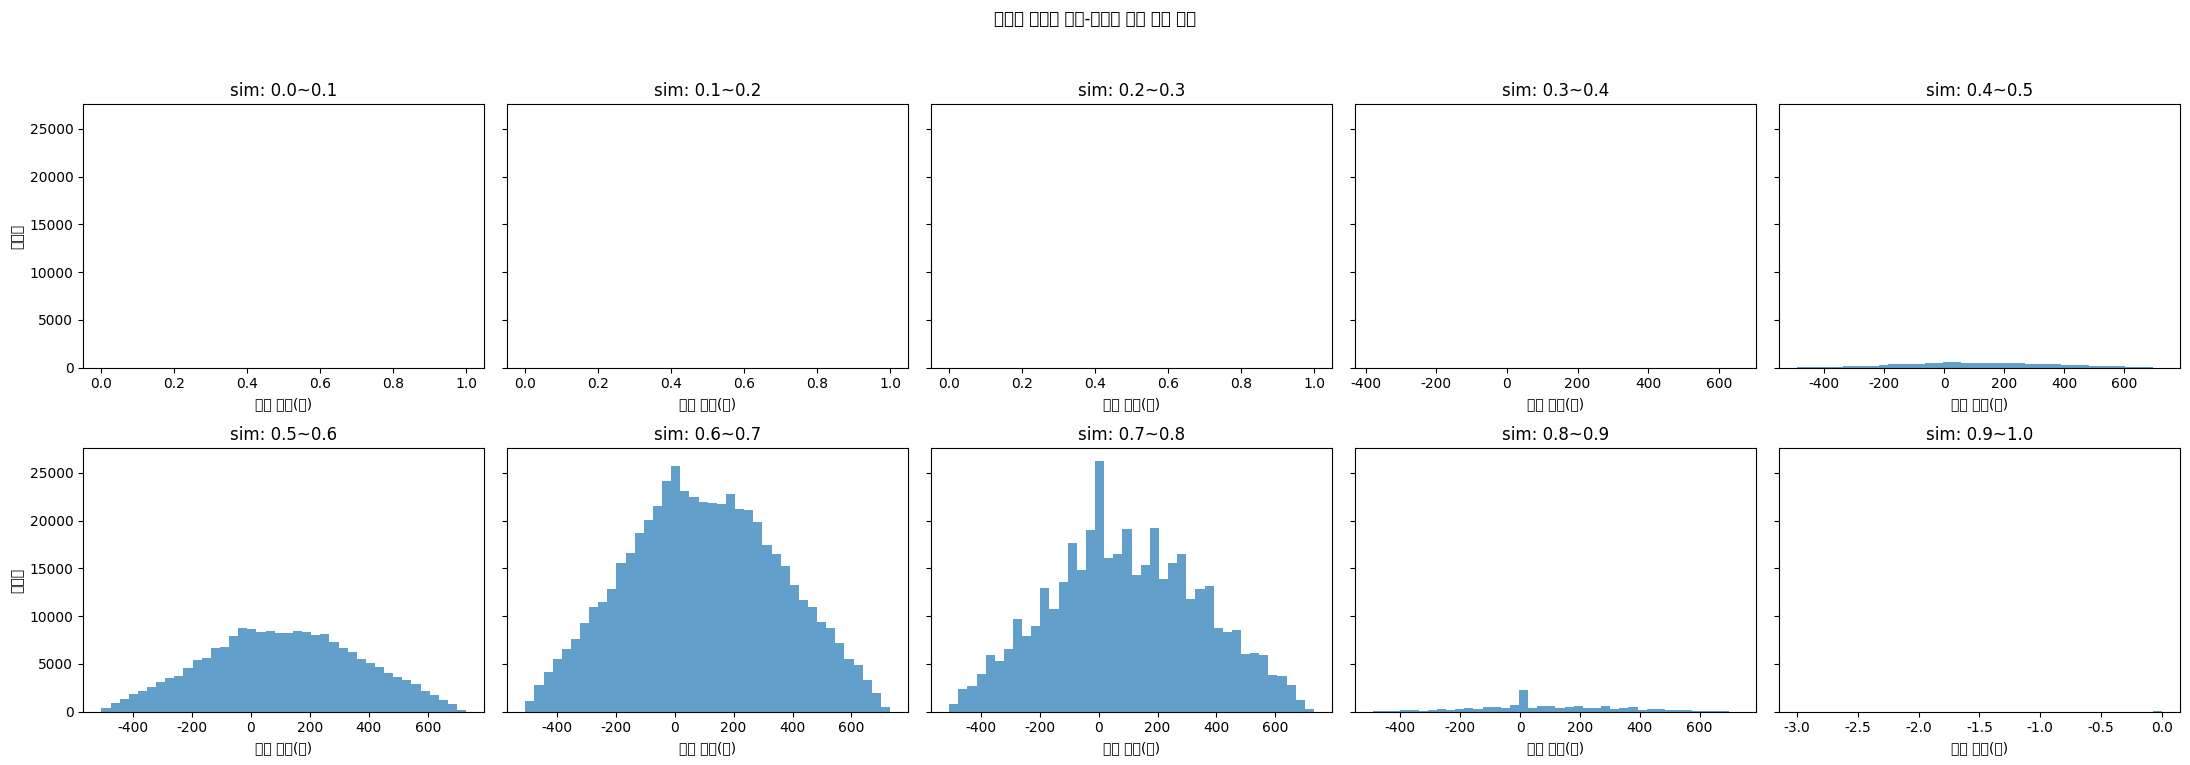

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(22, 8), sharey=True)
axes = axes.flatten()

for idx, label in enumerate(labels):
    subset = result_df[result_df['sim_bin'] == label]['date_diff_days']
    axes[idx].hist(subset, bins=40, alpha=0.7)
    axes[idx].set_title(f"sim: {label}")
    axes[idx].set_xlabel("날짜 차이(일)")
    if idx % 5 == 0:
        axes[idx].set_ylabel("빈도수")

plt.suptitle("유사도 구간별 뉴스-리포트 날짜 차이 분포")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### 유사도 구간 0.05

In [ ]:
import numpy as np

bins = np.arange(0, 1.05, 0.05)  # 0.00 ~ 1.00, 0.05 간격
labels = [f"{round(b,2)}~{round(b+0.05,2)}" for b in bins[:-1]]

result_df['sim_bin_05'] = pd.cut(result_df['sim'], bins=bins, labels=labels, include_lowest=True, right=False)

In [ ]:
sim_bin_counts = result_df['sim_bin_05'].value_counts().sort_index()
print(sim_bin_counts)

sim_bin_05
0.0~0.05         0
0.05~0.1         0
0.1~0.15         0
0.15~0.2         0
0.2~0.25         0
0.25~0.3         0
0.3~0.35         2
0.35~0.4       113
0.4~0.45      1372
0.45~0.5     10544
0.5~0.55     48678
0.55~0.6    147201
0.6~0.65    259967
0.65~0.7    277149
0.7~0.75    258135
0.75~0.8    151148
0.8~0.85     13233
0.85~0.9       515
0.9~0.95        43
0.95~1.0         0
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52845 (\N{HANGUL SYLLABLE CING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

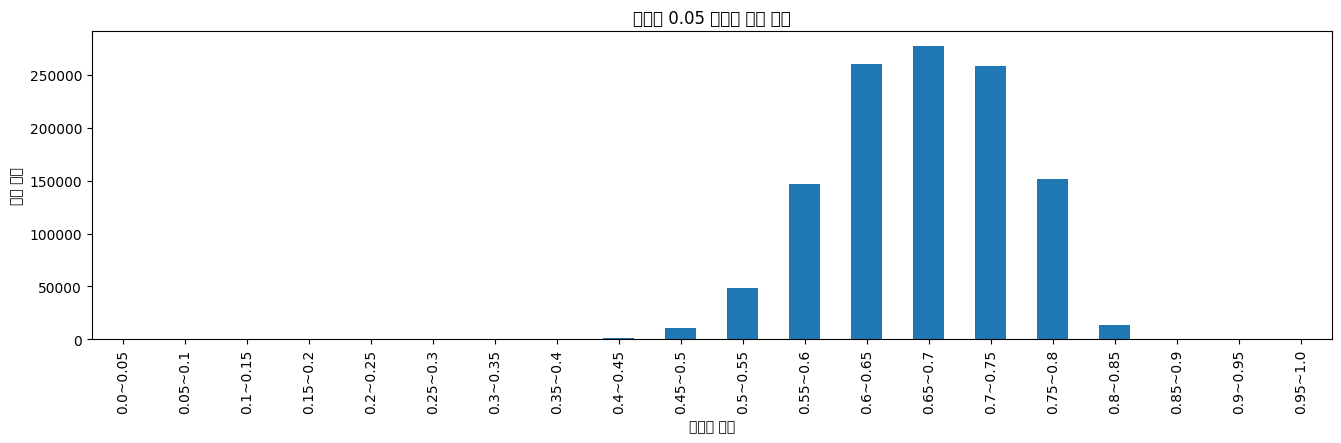

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

sim_bin_counts.plot(kind='bar', figsize=(16,4))
plt.xlabel("유사도 구간")
plt.ylabel("매칭 개수")
plt.title("유사도 0.05 간격별 매칭 개수")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 0.5~1.0, 0.05 간격
bins = np.arange(0.5, 1.05, 0.05)
labels = [f"{round(b,2)}~{round(b+0.05,2)}" for b in bins[:-1]]

result_df['sim_bin_05'] = pd.cut(result_df['sim'], bins=bins, labels=labels, include_lowest=True, right=False)

<ipython-input-29-0ae27de68373>:14: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-29-0ae27de68373>:14: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-29-0ae27de68373>:14: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-29-0ae27de68373>:14: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-29-0ae27de68373>:14: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-29-0ae27de68373>:14: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input

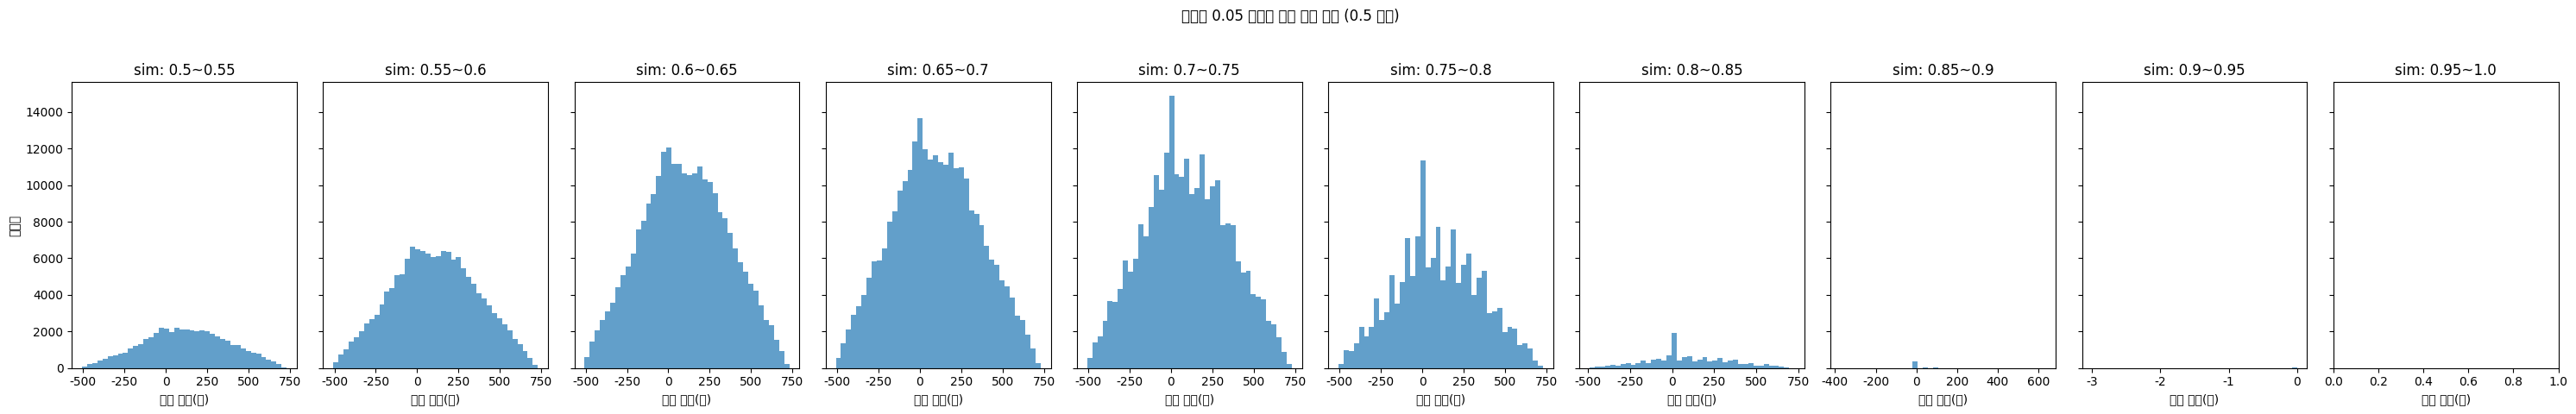

In [ ]:
n_bins = len(labels)
fig, axes = plt.subplots(1, n_bins, figsize=(3*n_bins, 5), sharey=True)

for idx, label in enumerate(labels):
    subset = result_df[result_df['sim_bin_05'] == label]['date_diff_days']
    if len(subset) > 0:
        axes[idx].hist(subset, bins=40, alpha=0.7)
    axes[idx].set_title(f"sim: {label}")
    axes[idx].set_xlabel("날짜 차이(일)")
    if idx == 0:
        axes[idx].set_ylabel("빈도수")

plt.suptitle("유사도 0.05 간격별 날짜 차이 분포 (0.5 이상)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
high_sim_count = (result_df['sim'] >= 0.75).sum()
print("유사도 0.75 이상 매칭 개수:", high_sim_count)

유사도 0.75 이상 매칭 개수: 164939


In [ ]:
len(result_df)

1168100

In [ ]:
164939/1168100 *100

14.120280797876894

- 유사도 0.75 이상 : 14%

In [ ]:
filtered_result_df = result_df[
    (result_df['sim'] >= 0.75) &
    (result_df['date_diff_days'].abs() <= 90)
].reset_index(drop=True)

In [ ]:
len(filtered_result_df)

46294

In [ ]:
46294/1168100 *100

3.963188083212054

In [ ]:
filtered_result_df.iloc[40000:40010]

,news_id,wdate,news_title,news_content,report_id,작성일,report_title,report_content,sim,date_diff_days,sim_bin,sim_bin_05
40000,20240314_0273,2024-03-14 08:29:00,"키움증권 ""오리온 1분기 영업이익 눈높이 부합 예상""",오리온 본사\n[오리온 제공]\n(서울=연합뉴스) 송은경 기자 = 키움증권은 14일...,20240208_0073,2024-02-08,동종업체 중 가장 빛나는 펀더멘털,4Q23 Review\n오리온의 4Q23 연결 매출액 및 영업이익 성장률은 각각 -...,0.785801,35,0.7~0.8,0.75~0.8
40001,20240314_0273,2024-03-14 08:29:00,"키움증권 ""오리온 1분기 영업이익 눈높이 부합 예상""",오리온 본사\n[오리온 제공]\n(서울=연합뉴스) 송은경 기자 = 키움증권은 14일...,20240418_0004,2024-04-18,주주환원이 더해진 영업실적,1Q24 주요법인 영업실적 Review\n오리온의 1Q24 주요 4개법인 합산 매출...,0.750115,-35,0.7~0.8,0.75~0.8
40002,20240314_0277,2024-03-14 08:26:00,"[클릭 e종목]""아세아시멘트, 주주친화 정책으로 반등 기대""",신한투자증권은 아세아시멘트에 대해 주주친화적인 정책으로 주가 반등이 기대된다고 14...,20240314_0017,2024-03-14,주주친화적 스탠스로 반등을 기대,"예상과 크게 다르지 않았던 4Q23\n4Q23 연결실적은 매출액 3,140억원(Yo...",0.795624,0,0.7~0.8,0.75~0.8
40003,20240314_0277,2024-03-14 08:26:00,"[클릭 e종목]""아세아시멘트, 주주친화 정책으로 반등 기대""",신한투자증권은 아세아시멘트에 대해 주주친화적인 정책으로 주가 반등이 기대된다고 14...,20240425_0045,2024-04-25,전부문 수익성 안정화로 OP 서프라이즈,"고수익 제품 매출 증가로 OP 기준 컨센서스 45% 상회\n1Q24 매출액 8,49...",0.795516,-42,0.7~0.8,0.75~0.8
40004,20240314_0277,2024-03-14 08:26:00,"[클릭 e종목]""아세아시멘트, 주주친화 정책으로 반등 기대""",신한투자증권은 아세아시멘트에 대해 주주친화적인 정책으로 주가 반등이 기대된다고 14...,20240424_0011,2024-04-24,발전 부문 마진 상승. 건설도 정상화,"목표주가 42,000원, 투자의견 매수 유지\nSGC에너지 목표주가 42,000원과...",0.788555,-41,0.7~0.8,0.75~0.8
40005,20240314_0277,2024-03-14 08:26:00,"[클릭 e종목]""아세아시멘트, 주주친화 정책으로 반등 기대""",신한투자증권은 아세아시멘트에 대해 주주친화적인 정책으로 주가 반등이 기대된다고 14...,20240206_0012,2024-02-06,일회성을 제외하더라도 17%대의 이익률,목표주가를 6.0만원으로 상향\n한국타이어앤테크놀로지에 대한 투자의견 BUY를 유지...,0.782450,37,0.7~0.8,0.75~0.8
40006,20240314_0277,2024-03-14 08:26:00,"[클릭 e종목]""아세아시멘트, 주주친화 정책으로 반등 기대""",신한투자증권은 아세아시멘트에 대해 주주친화적인 정책으로 주가 반등이 기대된다고 14...,20240215_0002,2024-02-15,분기 최대 매출과 실적 서프라이즈,"목표주가 52,000원, 투자의견 매수 유지\n한전KPS 목표주가 52,000원과 ...",0.780760,28,0.7~0.8,0.75~0.8
40007,20240314_0277,2024-03-14 08:26:00,"[클릭 e종목]""아세아시멘트, 주주친화 정책으로 반등 기대""",신한투자증권은 아세아시멘트에 대해 주주친화적인 정책으로 주가 반등이 기대된다고 14...,20240517_0025,2024-05-17,회사가 달라지고 있어요,"성장성/수익성이 개선되었는데, P/E는 3.6배에 불과\n피에이치에이에 대한 투자의...",0.780433,-64,0.7~0.8,0.75~0.8
40008,20240314_0279,2024-03-14 08:24:00,"음식료 포장+배터리 사업…동원시스템즈, 신성장 동력 확보-유진",동원시스템즈 로고\n유진투자증권은 동원시스템즈가 배터리 사업을 신성장 동력으로 선정...,20240314_0014,2024-03-14,전기차 배터리 모멘텀 On,배터리 사업 성장\r\n드라이브 뚜렷\n동원시스템즈는 기존 음식료 포장사업에 배터리...,0.831928,0,0.8~0.9,0.8~0.85
40009,20240314_0280,2024-03-14 08:24:00,"[클릭 e종목]""테크윙, HBM 테스트 핸들러 폭발적 성장 기대""",대신증권은 14일 테크윙에 대해 고대역폭메모리(HBM) 테스트 핸들러 신사업의 폭발...,20240612_0010,2024-06-12,메모리기판의 회복 흐름 가속화 (feat. 저점 ..,메모리기판 회복세\n당초 예상보다 메모리기판의 회복세가 가파르다. MCP (모바일메...,0.783217,-90,0.7~0.8,0.75~0.8


### 같은 news_id에서 가장 유사도 높은 report만 필터링
- 이후 날짜 차이 가장 작은것

In [ ]:
# news_id별로 sim이 가장 큰 것만 남기기
filtered_top_sim_df = (
    filtered_result_df
    .sort_values('sim', ascending=False)
    .drop_duplicates(subset=['news_id'], keep='first')
    .reset_index(drop=True)
)

In [ ]:
filtered_top_sim_df.tail(10)

,news_id,wdate,news_title,news_content,report_id,작성일,report_title,report_content,sim,date_diff_days,sim_bin,sim_bin_05
13812,20241004_0037,2024-10-04 16:51:00,"NFC용 반도체 전문 쓰리에이로직스, 증권신고서 제출",쓰리에이로직스 CI\n[파이낸셜뉴스] 근거리 무선통신(NFC) 분야 팹리스 기업 쓰...,20241111_0072,2024-11-11,"유상증자 코멘트: MLB는 전례 없는 호황, 제..","◎ 이수페타시스, 5,498억원의 유상증자 결정. 기존 주식수의 31.8%에 해당하...",0.750022,-38,0.7~0.8,0.75~0.8
13813,20240902_0093,2024-09-02 13:15:00,"신테카바이오, 글로벌 화합물 공급 기업 ‘에나민’과 AI 기반 합성신약 개발 협력",신테카바이오가 글로벌 화합물 기업 에나민과의 전략적 파트너십 체결로 AI 합성신약 ...,20240621_0011,2024-06-21,"한컴, 드디어 AI 사업 확대 나선다","I. News Comment & 2Q24 Preview\n전일(06/20), 동사는...",0.750019,73,0.7~0.8,0.75~0.8
13814,20240809_0195,2024-08-09 09:16:00,"매수청구권 폭탄 대비…두산밥캣, 해외서 1.5조 들여온다",본사 현금 500억원 불과…해외법인 배당·유상감자 등 추진\n합병 반대주주 주식매수...,20240715_0038,2024-07-15,두산 그룹 지배구조 개편 관련 코멘트,◎ 두산밥캣 상장 폐지 결정\n>> 1) 두산에너빌리티를 사업법인과 두산밥캣의 지분...,0.750019,25,0.7~0.8,0.75~0.8
13815,20240314_0115,2024-03-14 13:50:00,"경영관리 SaaS 비즈니스온, 매출 500억 돌파…영업익 36%↑",전자세금계산서·전자서명 등 기업용 서비스형 소프트웨어(B2B SaaS) 기업 비즈니...,20240508_0019,2024-05-08,"1Q24 반등 성공, 도약 위한 준비 착착",1Q24 흑자전환 성공\n대교의 영업실적 잠정공시에 따르면 1Q24 별도기준 영업이...,0.750018,-55,0.7~0.8,0.75~0.8
13816,20250106_0093,2025-01-06 09:56:00,"이에이트, 네이버 클라우드와 파트너십 체결",시뮬레이션 기반 디지털 트윈 플랫폼 기업 이에이트는 국내 최대 퍼블릭 클라우드 서비...,20241024_0030,2024-10-24,"B2B 생성형 AI 시장의 개화, 루시아 부각 전..","B2B, B2C를 아우르는 AI 솔루션 라인업을 보유한 기업\n솔트룩스는 2000년...",0.750018,74,0.7~0.8,0.75~0.8
13817,20240717_0164,2024-07-17 10:06:00,"소니드, 서울대·스타랩스와 협력해 CXL-GPU 기술 개발",[이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는 유니콘팩토리 빅데이터 플랫...,20240703_0012,2024-07-03,생성형 AI 단점 보완해주는 최고의 솔루션,데이터 전처리 및 공급 플랫폼 전문 업체\n비큐 AI 는 AI 및 빅데이터를 기반으...,0.750013,14,0.7~0.8,0.75~0.8
13818,20250219_0142,2025-02-19 08:45:00,"[클릭 e종목]""파라다이스, 코로나 수요 감소 회복됐지만 어닝쇼크…목표가↓""",목표가 기존 대비 7% 하향 조정\n현대차증권은 19일 파라다이스에 대해 지난해 4...,20250509_0057,2025-05-09,예상대로 순조로운 출발,"비용 효율화, 영업이익이 시장 기대치를 5% 상회\n기존 매수 의견을 유지하고, 실...",0.750012,-79,0.7~0.8,0.75~0.8
13819,20240812_0073,2024-08-12 14:56:00,"프로티아 ""상반기 흑자전환 성공…생산시설 확대""",프로티아는 상반기 매출이 46억2152먼원으로 전년 동기 대비 20% 늘었다고 12...,20241018_0015,2024-10-18,국내 임상 CRO의 나아갈 길,■ 씨엔알리서치는 신약개발회사의 의뢰를 받아 임상과 관련한 전 영역의 서비스를 제공...,0.750012,-67,0.7~0.8,0.75~0.8
13820,20250515_0153,2025-05-15 09:32:00,"금호에이치티, 1분기 영업이익 26억 흑자유지…""해외·자율주행 램프로 성장모멘텀""",자동차 전장 전문 기업 금호에이치티는 올해 1분기 연결기준 26억원의 영업이익을 달...,20250425_0042,2025-04-25,차근차근 개선되는 중,1분기: 양극재/기초소재 부문 호실적으로 컨센서스 상회\n동사의 1분기 실적은 매출...,0.750009,20,0.7~0.8,0.75~0.8
13821,20250204_0123,2025-02-04 08:26:00,"[오늘 상장]'AI소프트웨어' 피아이이, 코스닥 데뷔",[이데일리 신하연 기자] AI 소프트웨어(SW) 전문 기업 피아이이가 오늘(4일) ...,20250317_0010,2025-03-17,DN솔루션즈의 상장 소식,DN솔루션즈가 5월 16일 거래소 상장될 예정\nDN오토모티브가 84.83% 지분을...,0.750009,-41,0.7~0.8,0.75~0.8


In [ ]:
# 필요한 컬럼만 추출해서 merge
filtered_top_sim_df = filtered_top_sim_df.merge(
    report_df[['report_id', '종목명']],
    on='report_id',
    how='left'
)

In [ ]:
filtered_top_sim_df.tail(10)

,news_id,wdate,news_title,news_content,report_id,작성일,report_title,report_content,sim,date_diff_days,sim_bin,sim_bin_05,종목명
13812,20241004_0037,2024-10-04 16:51:00,"NFC용 반도체 전문 쓰리에이로직스, 증권신고서 제출",쓰리에이로직스 CI\n[파이낸셜뉴스] 근거리 무선통신(NFC) 분야 팹리스 기업 쓰...,20241111_0072,2024-11-11,"유상증자 코멘트: MLB는 전례 없는 호황, 제..","◎ 이수페타시스, 5,498억원의 유상증자 결정. 기존 주식수의 31.8%에 해당하...",0.750022,-38,0.7~0.8,0.75~0.8,이수페타시스
13813,20240902_0093,2024-09-02 13:15:00,"신테카바이오, 글로벌 화합물 공급 기업 ‘에나민’과 AI 기반 합성신약 개발 협력",신테카바이오가 글로벌 화합물 기업 에나민과의 전략적 파트너십 체결로 AI 합성신약 ...,20240621_0011,2024-06-21,"한컴, 드디어 AI 사업 확대 나선다","I. News Comment & 2Q24 Preview\n전일(06/20), 동사는...",0.750019,73,0.7~0.8,0.75~0.8,한글과컴퓨터
13814,20240809_0195,2024-08-09 09:16:00,"매수청구권 폭탄 대비…두산밥캣, 해외서 1.5조 들여온다",본사 현금 500억원 불과…해외법인 배당·유상감자 등 추진\n합병 반대주주 주식매수...,20240715_0038,2024-07-15,두산 그룹 지배구조 개편 관련 코멘트,◎ 두산밥캣 상장 폐지 결정\n>> 1) 두산에너빌리티를 사업법인과 두산밥캣의 지분...,0.750019,25,0.7~0.8,0.75~0.8,두산밥캣
13815,20240314_0115,2024-03-14 13:50:00,"경영관리 SaaS 비즈니스온, 매출 500억 돌파…영업익 36%↑",전자세금계산서·전자서명 등 기업용 서비스형 소프트웨어(B2B SaaS) 기업 비즈니...,20240508_0019,2024-05-08,"1Q24 반등 성공, 도약 위한 준비 착착",1Q24 흑자전환 성공\n대교의 영업실적 잠정공시에 따르면 1Q24 별도기준 영업이...,0.750018,-55,0.7~0.8,0.75~0.8,대교
13816,20250106_0093,2025-01-06 09:56:00,"이에이트, 네이버 클라우드와 파트너십 체결",시뮬레이션 기반 디지털 트윈 플랫폼 기업 이에이트는 국내 최대 퍼블릭 클라우드 서비...,20241024_0030,2024-10-24,"B2B 생성형 AI 시장의 개화, 루시아 부각 전..","B2B, B2C를 아우르는 AI 솔루션 라인업을 보유한 기업\n솔트룩스는 2000년...",0.750018,74,0.7~0.8,0.75~0.8,솔트룩스
13817,20240717_0164,2024-07-17 10:06:00,"소니드, 서울대·스타랩스와 협력해 CXL-GPU 기술 개발",[이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는 유니콘팩토리 빅데이터 플랫...,20240703_0012,2024-07-03,생성형 AI 단점 보완해주는 최고의 솔루션,데이터 전처리 및 공급 플랫폼 전문 업체\n비큐 AI 는 AI 및 빅데이터를 기반으...,0.750013,14,0.7~0.8,0.75~0.8,비큐AI
13818,20250219_0142,2025-02-19 08:45:00,"[클릭 e종목]""파라다이스, 코로나 수요 감소 회복됐지만 어닝쇼크…목표가↓""",목표가 기존 대비 7% 하향 조정\n현대차증권은 19일 파라다이스에 대해 지난해 4...,20250509_0057,2025-05-09,예상대로 순조로운 출발,"비용 효율화, 영업이익이 시장 기대치를 5% 상회\n기존 매수 의견을 유지하고, 실...",0.750012,-79,0.7~0.8,0.75~0.8,LG유플러스
13819,20240812_0073,2024-08-12 14:56:00,"프로티아 ""상반기 흑자전환 성공…생산시설 확대""",프로티아는 상반기 매출이 46억2152먼원으로 전년 동기 대비 20% 늘었다고 12...,20241018_0015,2024-10-18,국내 임상 CRO의 나아갈 길,■ 씨엔알리서치는 신약개발회사의 의뢰를 받아 임상과 관련한 전 영역의 서비스를 제공...,0.750012,-67,0.7~0.8,0.75~0.8,씨엔알리서치
13820,20250515_0153,2025-05-15 09:32:00,"금호에이치티, 1분기 영업이익 26억 흑자유지…""해외·자율주행 램프로 성장모멘텀""",자동차 전장 전문 기업 금호에이치티는 올해 1분기 연결기준 26억원의 영업이익을 달...,20250425_0042,2025-04-25,차근차근 개선되는 중,1분기: 양극재/기초소재 부문 호실적으로 컨센서스 상회\n동사의 1분기 실적은 매출...,0.750009,20,0.7~0.8,0.75~0.8,포스코퓨처엠
13821,20250204_0123,2025-02-04 08:26:00,"[오늘 상장]'AI소프트웨어' 피아이이, 코스닥 데뷔",[이데일리 신하연 기자] AI 소프트웨어(SW) 전문 기업 피아이이가 오늘(4일) ...,20250317_0010,2025-03-17,DN솔루션즈의 상장 소식,DN솔루션즈가 5월 16일 거래소 상장될 예정\nDN오토모티브가 84.83% 지분을...,0.750009,-41,0.7~0.8,0.75~0.8,DN오토모티브


### 같은 뉴스 id 별로 유사도 가장 높은 top 3

In [ ]:
filtered_top3_sim_df = (
    filtered_result_df
    .sort_values(['news_id', 'sim'], ascending=[True, False])
    .groupby('news_id')
    .head(3)        # 각 news_id 그룹별로 상위 3개
    .reset_index(drop=True)
)

In [ ]:
filtered_top3_sim_df = filtered_top3_sim_df.merge(
    report_df[['report_id', '종목명']],
    on='report_id',
    how='left'
)

In [ ]:
filtered_top3_sim_df.tail(10)

,news_id,wdate,news_title,news_content,report_id,작성일,report_title,report_content,sim,date_diff_days,sim_bin,sim_bin_05,종목명
30307,20250523_0111,2025-05-23 07:45:00,"한미글로벌, 1Q 실적 양호…중동 수주 지속 전망-IBK",[이데일리 김응태 기자] IBK투자증권은 23일 한미글로벌(053690)에 대해 국...,20250428_0046,2025-04-28,실적도 수주도 서프라이즈,"목표주가 600,000원, 투자의견 매수 유지\n효성중공업 목표주가 600,000원...",0.793038,25,0.7~0.8,0.75~0.8,효성중공업
30308,20250523_0111,2025-05-23 07:45:00,"한미글로벌, 1Q 실적 양호…중동 수주 지속 전망-IBK",[이데일리 김응태 기자] IBK투자증권은 23일 한미글로벌(053690)에 대해 국...,20250519_0051,2025-05-19,1Q25 Review: ‘금융 AI 에이전트 기업’으로..,I. 1Q25 Review & 2Q25 Preview\n최근(05/15) 발표한 1...,0.790066,4,0.7~0.8,0.75~0.8,웹케시
30309,20250523_0112,2025-05-23 07:43:00,"농심, 밸류업 공시…실적에 따른 주가 리레이팅 기대-DS",[이데일리 이용성 기자] DS투자증권은 23일 농심(004370)이 밸류업 공시를 ...,20250227_0007,2025-02-27,3월 전략 - 신뢰도 높아지면서 주가 오를 것,"투자의견 매수/목표가 14,000원 유지, 이제 주가 다시 오를 것\nLGU+에 대...",0.789785,85,0.7~0.8,0.75~0.8,LG유플러스
30310,20250523_0112,2025-05-23 07:43:00,"농심, 밸류업 공시…실적에 따른 주가 리레이팅 기대-DS",[이데일리 이용성 기자] DS투자증권은 23일 농심(004370)이 밸류업 공시를 ...,20250502_0038,2025-05-02,올해는 외형과 이익 모두 성장,"목표주가 25,000원, 투자의견 매수 유지\n두산퓨얼셀 목표주가 25,000원과 ...",0.778968,21,0.7~0.8,0.75~0.8,두산퓨얼셀
30311,20250523_0112,2025-05-23 07:43:00,"농심, 밸류업 공시…실적에 따른 주가 리레이팅 기대-DS",[이데일리 이용성 기자] DS투자증권은 23일 농심(004370)이 밸류업 공시를 ...,20250430_0050,2025-04-30,5월 전략 - 실적과 밸류업 기대감 높아질 시..,"투자의견 매수/목표가 14,000원 유지, 단기 투자 매력도 높음 평가\nLGU+에...",0.776125,23,0.7~0.8,0.75~0.8,LG유플러스
30312,20250523_0113,2025-05-23 07:38:00,"삼성바이오로직스, 인적분할로 즉각적 이익…목표가 13.9%↑-하나",[이데일리 원다연 기자] 하나증권은 23일 삼성바이오로직스(207940)에 대해 인...,20250523_0009,2025-05-23,"오래 기다렸던, 초격차를 위한 큰 결정","인적분할은 로직스에 즉각적, 에피스에 중장기적으로 이익\n이번 인적 분할은 로직스가...",0.833450,0,0.8~0.9,0.8~0.85,삼성바이오로직스
30313,20250523_0115,2025-05-23 07:30:00,"솔루엠, 2분기 실적 개선 기대…목표가 20.7%↓-BNK",[이데일리 원다연 기자] BNK투자증권은 23일 솔루엠(248070)에 대해 2분기...,20250423_0008,2025-04-23,예상보다 컸던 원가 상승,"목표주가 38,000원, 투자의견 매수 유지\nSGC에너지 목표주가 38,000원과...",0.784253,30,0.7~0.8,0.75~0.8,SGC에너지
30314,20250523_0116,2025-05-23 07:29:00,"[클릭 e종목]""크래프톤, 이제 서브노티카2에 빠질 시간""",IBK투자증권이 23일 크래프톤에 대해 최근 출시한 '인조이'가 양호한 성과를 기록...,20250423_0019,2025-04-23,우호적인 사업환경 지속,1분기 매출과 영업이익 모두 시장 기대치 상회\n매수 의견과 목표주가 46만원을 유...,0.792935,30,0.7~0.8,0.75~0.8,HD현대일렉트릭
30315,20250523_0116,2025-05-23 07:29:00,"[클릭 e종목]""크래프톤, 이제 서브노티카2에 빠질 시간""",IBK투자증권이 23일 크래프톤에 대해 최근 출시한 '인조이'가 양호한 성과를 기록...,20250509_0079,2025-05-09,신작 러시와 수익성 개선으로 다음 스테이지 ..,"1분기 실적 컨센서스 상회\n넷마블은 2025년 1분기 연결 기준 매출 6,239억...",0.770969,14,0.7~0.8,0.75~0.8,넷마블
30316,20250523_0116,2025-05-23 07:29:00,"[클릭 e종목]""크래프톤, 이제 서브노티카2에 빠질 시간""",IBK투자증권이 23일 크래프톤에 대해 최근 출시한 '인조이'가 양호한 성과를 기록...,20250520_0009,2025-05-20,1Q25 Review: K-Food 수혜는 여전하다,I. 1Q25 Review & 2Q25 Preview\n전일(05/15) 발표한 1...,0.767082,3,0.7~0.8,0.75~0.8,에스앤디


In [ ]:
len(filtered_top3_sim_df)

30317

In [ ]:
filtered_top3_sim_df.iloc[15000:15010]

,news_id,wdate,news_title,news_content,report_id,작성일,report_title,report_content,sim,date_diff_days,sim_bin,sim_bin_05,종목명
15000,20240823_0212,2024-08-23 08:24:00,"""HDC현산, 올해 주가 65% 급등에도 매력적""-신한",신한투자증권은 23일 HDC현대산업개발에 대해 주택시장이 회복으로 자산가치가 높아지...,20240823_0002,2024-08-23,여전히 매력적인 이유,업황 회복과 함께 높아지는 기업가치\n주택시장 회복 및 실적 턴어라운드 기대감 기반...,0.763203,0,0.7~0.8,0.75~0.8,HDC현대산업개발
15001,20240823_0215,2024-08-23 08:18:00,"""한국전력, 4분기 실적 개선 기대""-대신증권",서울 중구 한국전력 서울본부 1층에 설치된 모니터에 전력수급현황이 나타나고 있다./...,20240924_0028,2024-09-24,전기 요금 인상 무산에도 실적 개선 추세는 ..,또 다시 무산된 전기 요금 인상\n언론에서 따르면 한국전력은 4Q24 적용될 연료비...,0.772806,-32,0.7~0.8,0.75~0.8,한국전력
15002,20240823_0215,2024-08-23 08:18:00,"""한국전력, 4분기 실적 개선 기대""-대신증권",서울 중구 한국전력 서울본부 1층에 설치된 모니터에 전력수급현황이 나타나고 있다./...,20240809_0049,2024-08-09,좋다고 보기에는 아쉬운 실적,"목표주가 24,000원, 투자의견 매수 유지\n한국전력 목표주가 24,000원, 투...",0.753107,14,0.7~0.8,0.75~0.8,한국전력
15003,20240823_0219,2024-08-23 08:15:00,"LG이노텍, 9월 핵심 고객사 Gen AI 스마트폰 출시-상상인","LG이노텍 제공\nLG이노텍\n[파이낸셜뉴스] 정민규 상상인증권 연구원은 23일 ""...",20240605_0002,2024-06-05,하반기 북미제조사 AI 모멘텀 지속 예상,"2분기, 비수기에도 호실적 전망\n2분기 영업이익은 156억원(+46%)으로 컨센서...",0.756492,79,0.7~0.8,0.75~0.8,비에이치
15004,20240823_0219,2024-08-23 08:15:00,"LG이노텍, 9월 핵심 고객사 Gen AI 스마트폰 출시-상상인","LG이노텍 제공\nLG이노텍\n[파이낸셜뉴스] 정민규 상상인증권 연구원은 23일 ""...",20240802_0053,2024-08-02,2Q24 Review: 하반기를 기대하며,"- 2분기 실적은 매출 498억원(YoY +38%, QoQ +42%), 영업이익 1...",0.751522,21,0.7~0.8,0.75~0.8,ISC
15005,20240823_0221,2024-08-23 08:10:00,"지아이이노베이션, R&D 비용 감소로 실적 개선 ""유동성 문제 없다""",[파이낸셜뉴스] 혁신신약 개발기업 지아이이노베이션의 올해 2·4분기 실적이 대폭 개...,20240808_0033,2024-08-08,진정한 Best-in-class를 위한 준비,"2Q24 Review: 영업손실 31억원(적전 YoY), 시장 기대치 하회\n한올바...",0.779429,15,0.7~0.8,0.75~0.8,한올바이오파마
15006,20240823_0221,2024-08-23 08:10:00,"지아이이노베이션, R&D 비용 감소로 실적 개선 ""유동성 문제 없다""",[파이낸셜뉴스] 혁신신약 개발기업 지아이이노베이션의 올해 2·4분기 실적이 대폭 개...,20240812_0061,2024-08-12,2Q24 Review: R&D 투자 확대 수혜는 내년을 ..,I. 2Q24 Review & 투자의견\n최근(08/08) 발표한 2 분기 잠정실적...,0.763886,11,0.7~0.8,0.75~0.8,텔레칩스
15007,20240823_0221,2024-08-23 08:10:00,"지아이이노베이션, R&D 비용 감소로 실적 개선 ""유동성 문제 없다""",[파이낸셜뉴스] 혁신신약 개발기업 지아이이노베이션의 올해 2·4분기 실적이 대폭 개...,20241105_0024,2024-11-05,위기대응 전략 가동,3Q24 Review: 매출 및 영업이익 모두 시장기대치 하회\n매출액은 전년 대비...,0.761399,-74,0.7~0.8,0.75~0.8,고영
15008,20240823_0223,2024-08-23 08:08:00,"한국앤컴퍼니, 에너지솔루션 사업 중심 손익 개선 지속-현대차",[이데일리 김응태 기자] 현대차증권은 23일 한국앤컴퍼니(000240)에 대해 에너...,20241018_0007,2024-10-18,중공업 두 자리 수 마진을 향해,"목표주가 520,000원으로 상향, 투자의견 매수 유지\n효성중공업 목표주가를 52...",0.774371,-56,0.7~0.8,0.75~0.8,효성중공업
15009,20240823_0223,2024-08-23 08:08:00,"한국앤컴퍼니, 에너지솔루션 사업 중심 손익 개선 지속-현대차",[이데일리 김응태 기자] 현대차증권은 23일 한국앤컴퍼니(000240)에 대해 에너...,20240724_0014,2024-07-24,"돋보였던 2분기, 하반기도 괜찮을 실적","2Q Review: REC 재정산 효과 크게 반영\n2분기는 매출액 6,068억원(...",0.770067,30,0.7~0.8,0.75~0.8,SGC에너지


### filtered_top3_sim_df 에서 날짜 차이가 30일 이내인것

In [ ]:
filtered_top3_sim_30_df = filtered_top3_sim_df[
    filtered_top3_sim_df['date_diff_days'].abs() <= 30
].reset_index(drop=True)

In [ ]:
filtered_top3_sim_30_df.tail(10)

,news_id,wdate,news_title,news_content,report_id,작성일,report_title,report_content,sim,date_diff_days,sim_bin,sim_bin_05,종목명
14595,20250523_0111,2025-05-23 07:45:00,"한미글로벌, 1Q 실적 양호…중동 수주 지속 전망-IBK",[이데일리 김응태 기자] IBK투자증권은 23일 한미글로벌(053690)에 대해 국...,20250523_0023,2025-05-23,오일 머니는 마르지 않는다,국내 회복 + 중동 확장 = 안정적 성장 흐름\n한미글로벌의 2025년 1분기 실적...,0.832316,0,0.8~0.9,0.8~0.85,한미글로벌
14596,20250523_0111,2025-05-23 07:45:00,"한미글로벌, 1Q 실적 양호…중동 수주 지속 전망-IBK",[이데일리 김응태 기자] IBK투자증권은 23일 한미글로벌(053690)에 대해 국...,20250428_0046,2025-04-28,실적도 수주도 서프라이즈,"목표주가 600,000원, 투자의견 매수 유지\n효성중공업 목표주가 600,000원...",0.793038,25,0.7~0.8,0.75~0.8,효성중공업
14597,20250523_0111,2025-05-23 07:45:00,"한미글로벌, 1Q 실적 양호…중동 수주 지속 전망-IBK",[이데일리 김응태 기자] IBK투자증권은 23일 한미글로벌(053690)에 대해 국...,20250519_0051,2025-05-19,1Q25 Review: ‘금융 AI 에이전트 기업’으로..,I. 1Q25 Review & 2Q25 Preview\n최근(05/15) 발표한 1...,0.790066,4,0.7~0.8,0.75~0.8,웹케시
14598,20250523_0112,2025-05-23 07:43:00,"농심, 밸류업 공시…실적에 따른 주가 리레이팅 기대-DS",[이데일리 이용성 기자] DS투자증권은 23일 농심(004370)이 밸류업 공시를 ...,20250502_0038,2025-05-02,올해는 외형과 이익 모두 성장,"목표주가 25,000원, 투자의견 매수 유지\n두산퓨얼셀 목표주가 25,000원과 ...",0.778968,21,0.7~0.8,0.75~0.8,두산퓨얼셀
14599,20250523_0112,2025-05-23 07:43:00,"농심, 밸류업 공시…실적에 따른 주가 리레이팅 기대-DS",[이데일리 이용성 기자] DS투자증권은 23일 농심(004370)이 밸류업 공시를 ...,20250430_0050,2025-04-30,5월 전략 - 실적과 밸류업 기대감 높아질 시..,"투자의견 매수/목표가 14,000원 유지, 단기 투자 매력도 높음 평가\nLGU+에...",0.776125,23,0.7~0.8,0.75~0.8,LG유플러스
14600,20250523_0113,2025-05-23 07:38:00,"삼성바이오로직스, 인적분할로 즉각적 이익…목표가 13.9%↑-하나",[이데일리 원다연 기자] 하나증권은 23일 삼성바이오로직스(207940)에 대해 인...,20250523_0009,2025-05-23,"오래 기다렸던, 초격차를 위한 큰 결정","인적분할은 로직스에 즉각적, 에피스에 중장기적으로 이익\n이번 인적 분할은 로직스가...",0.833450,0,0.8~0.9,0.8~0.85,삼성바이오로직스
14601,20250523_0115,2025-05-23 07:30:00,"솔루엠, 2분기 실적 개선 기대…목표가 20.7%↓-BNK",[이데일리 원다연 기자] BNK투자증권은 23일 솔루엠(248070)에 대해 2분기...,20250423_0008,2025-04-23,예상보다 컸던 원가 상승,"목표주가 38,000원, 투자의견 매수 유지\nSGC에너지 목표주가 38,000원과...",0.784253,30,0.7~0.8,0.75~0.8,SGC에너지
14602,20250523_0116,2025-05-23 07:29:00,"[클릭 e종목]""크래프톤, 이제 서브노티카2에 빠질 시간""",IBK투자증권이 23일 크래프톤에 대해 최근 출시한 '인조이'가 양호한 성과를 기록...,20250423_0019,2025-04-23,우호적인 사업환경 지속,1분기 매출과 영업이익 모두 시장 기대치 상회\n매수 의견과 목표주가 46만원을 유...,0.792935,30,0.7~0.8,0.75~0.8,HD현대일렉트릭
14603,20250523_0116,2025-05-23 07:29:00,"[클릭 e종목]""크래프톤, 이제 서브노티카2에 빠질 시간""",IBK투자증권이 23일 크래프톤에 대해 최근 출시한 '인조이'가 양호한 성과를 기록...,20250509_0079,2025-05-09,신작 러시와 수익성 개선으로 다음 스테이지 ..,"1분기 실적 컨센서스 상회\n넷마블은 2025년 1분기 연결 기준 매출 6,239억...",0.770969,14,0.7~0.8,0.75~0.8,넷마블
14604,20250523_0116,2025-05-23 07:29:00,"[클릭 e종목]""크래프톤, 이제 서브노티카2에 빠질 시간""",IBK투자증권이 23일 크래프톤에 대해 최근 출시한 '인조이'가 양호한 성과를 기록...,20250520_0009,2025-05-20,1Q25 Review: K-Food 수혜는 여전하다,I. 1Q25 Review & 2Q25 Preview\n전일(05/15) 발표한 1...,0.767082,3,0.7~0.8,0.75~0.8,에스앤디


In [ ]:
len(filtered_top3_sim_30_df)

14605

In [ ]:
filtered_top3_sim_30_df.iloc[10000:10030]

,news_id,wdate,news_title,news_content,report_id,작성일,report_title,report_content,sim,date_diff_days,sim_bin,sim_bin_05,종목명
10000,20241128_0247,2024-11-28 08:47:00,"SK하이닉스, 주당 고정배당금 25% 늘렸다…목표가 30만-IBK",/사진=뉴시스\nIBK투자증권이 새로운 주주환원 정책을 발표한 SK하이닉스에 대해 ...,20241128_0008,2024-11-28,주주 환원 및 기업 가치 제고 계획 공시,2025~2027년 주주환원 정책 발표\nSK하이닉스는 장 종료 후에 향후 3개년간...,0.790199,0,0.7~0.8,0.75~0.8,SK하이닉스
10001,20241128_0247,2024-11-28 08:47:00,"SK하이닉스, 주당 고정배당금 25% 늘렸다…목표가 30만-IBK",/사진=뉴시스\nIBK투자증권이 새로운 주주환원 정책을 발표한 SK하이닉스에 대해 ...,20241029_0014,2024-10-29,하방 경직성이 매우 높은 주가,"예상 배당 수익률 약 6%\n10월 기업가치재고계획을 발표했는데, 배당성향 최소 5...",0.763568,30,0.7~0.8,0.75~0.8,강원랜드
10002,20241128_0251,2024-11-28 08:46:00,"SK하이닉스, 주주환원·기업가치 제고 계획…합리적 결정-하나증권",지난 4일 서울 강남구 코엑스에서 열린 SK AI SUMMIT 2024에 SK하이닉...,20241128_0008,2024-11-28,주주 환원 및 기업 가치 제고 계획 공시,2025~2027년 주주환원 정책 발표\nSK하이닉스는 장 종료 후에 향후 3개년간...,0.816121,0,0.8~0.9,0.8~0.85,SK하이닉스
10003,20241128_0251,2024-11-28 08:46:00,"SK하이닉스, 주주환원·기업가치 제고 계획…합리적 결정-하나증권",지난 4일 서울 강남구 코엑스에서 열린 SK AI SUMMIT 2024에 SK하이닉...,20241128_0014,2024-11-28,체질 개선에 대한 의지,"기업가치 제고 계획: 고정배당 상향, 재무구조 개선, CapEx Discipline...",0.754157,0,0.7~0.8,0.75~0.8,SK하이닉스
10004,20241128_0253,2024-11-28 08:34:00,"하나증권, JYP엔터 목표가↑…""여전히 가장 저평가된 기획사""",JYP엔터테인먼트 로고\n[JYP엔터테인먼트 제공]\n(서울=연합뉴스) 곽윤아 기자...,20241128_0007,2024-11-28,여전히 가장 저평가된 기획사,목표주가 상향 및 하이브와 함께 최선호주 제시\n3분기 실적 서프라이즈에 더해 스트...,0.768862,0,0.7~0.8,0.75~0.8,JYP Ent.
10005,20241128_0259,2024-11-28 08:27:00,"대신증권 ""삼성화재, 내년 지배력 확대할 듯…초격차""",[삼성화재 제공. 재판매 및 DB 금지]\n(서울=연합뉴스) 조민정 기자 = 대신증...,20241129_0018,2024-11-29,초격차,내년 보험업계 경쟁 양상 달라질 수 밖에 없음\n내년 보험업계는 관전 포인트가 산재...,0.812296,-1,0.8~0.9,0.8~0.85,삼성화재
10006,20241128_0259,2024-11-28 08:27:00,"대신증권 ""삼성화재, 내년 지배력 확대할 듯…초격차""",[삼성화재 제공. 재판매 및 DB 금지]\n(서울=연합뉴스) 조민정 기자 = 대신증...,20241118_0027,2024-11-18,어렵지만 옳은 길,"투자의견 중립 유지, 목표주가 29,000원으로 하향\n현대해상에 대한 투자의견 중...",0.758696,10,0.7~0.8,0.75~0.8,현대해상
10007,20241128_0261,2024-11-28 08:19:00,"삼성증권, SK하이닉스 밸류업 호평…""주주환원보다 순현금""","SK하이닉스\n[촬영 안 철 수, 재판매 및 DB금지]\n(서울=연합뉴스) 송은경 ...",20241128_0008,2024-11-28,주주 환원 및 기업 가치 제고 계획 공시,2025~2027년 주주환원 정책 발표\nSK하이닉스는 장 종료 후에 향후 3개년간...,0.762824,0,0.7~0.8,0.75~0.8,SK하이닉스
10008,20241128_0263,2024-11-28 08:16:00,현대차 자사주 취득…단기 수급·중장기 주주환원 긍정적-하나,하나증권이 28일 현대차에 대해 투자의견 매수와 목표주가 31만원을 유지했다. 현대...,20241128_0006,2024-11-28,1조원 자기주식 취득,7천억원은 소각. 3천억원은 임직원 주식보상으로 활용\n현대차가 자기주식 취득을 결...,0.820942,0,0.8~0.9,0.8~0.85,현대차
10009,20241128_0263,2024-11-28 08:16:00,현대차 자사주 취득…단기 수급·중장기 주주환원 긍정적-하나,하나증권이 28일 현대차에 대해 투자의견 매수와 목표주가 31만원을 유지했다. 현대...,20241108_0003,2024-11-08,대형 리츠로의 도약,신규 자산 편입\n동사는 지난 7월 8일 장교동 한화빌딩 취득 공시 후 8월 28일...,0.774598,20,0.7~0.8,0.75~0.8,한화리츠


### 뉴스-리포트 날짜차이 0이하

In [ ]:
filtered_top3_sim_30_past_df = filtered_top3_sim_30_df[
    filtered_top3_sim_30_df['date_diff_days'] <= 0
].reset_index(drop=True)

In [ ]:
len(filtered_top3_sim_30_past_df)

9302

In [ ]:
filtered_top3_sim_30_past_df.iloc[8000:8010]

,news_id,wdate,news_title,news_content,report_id,작성일,report_title,report_content,sim,date_diff_days,sim_bin,sim_bin_05,종목명
8000,20250314_0105,2025-03-14 08:45:00,"메리츠증권 ""LS, 최근 단기 급등에도 주가 수준 여전히 매력적""",원본보기\nLS 로고\n[LS그룹 제공]\n(서울=연합뉴스) 곽윤아 기자 = 메리츠...,20250409_0014,2025-04-09,"2025년 절대 저평가 구간, 중장기 성장 스토..","- 투자의견 ‘매수’,목표주가 132,000원 제시.자회사들의 지분가치는 8.5조원...",0.761718,-26,0.7~0.8,0.75~0.8,LS
8001,20250314_0111,2025-03-14 08:34:00,"""씨어스테크놀로지, 의료장벽 허무는 게임 체인저로""-유안타",씨어스테크놀로지 CI /사진=씨어스테크놀로지\n유안타증권이 씨어스테크놀로지에 대해 ...,20250314_0003,2025-03-14,의료 장벽을 허무는 Game Changer,"We Make Medicine Smarter\n씨어스테크놀로지는 ‘09년 설립, ‘...",0.805960,0,0.8~0.9,0.8~0.85,씨어스테크놀로지
8002,20250314_0114,2025-03-14 08:29:00,"신한투자 ""퓨쳐켐, 전립선암 치료제 패러다임 전환 시도""",퓨쳐켐\n[퓨쳐켐 제공]\n(서울=연합뉴스) 조민정 기자 = 신한투자증권은 14일 ...,20250314_0004,2025-03-14,"전립선암 임상 3상 디자인, 진단법 주목",전립선암 치료 패러다임 전환하는 임상 3상 디자인\n지난 10일 전립선암 치료제 F...,0.837926,0,0.8~0.9,0.8~0.85,퓨쳐켐
8003,20250314_0115,2025-03-14 08:29:00,"“카카오, 오픈AI와의 제휴로 AI 모멘텀 기대”…목표가↑",[사진 = 카카오]\nNH투자증권은 14일 카카오에 대해 오픈AI와의 제휴로 인공지...,20250318_0013,2025-03-18,하반기 느좋,연중 다양한 AI 서비스 내놓을 것\n작년까지 카카오는 peer 대비 AI 기술 및...,0.811320,-4,0.8~0.9,0.8~0.85,카카오
8004,20250314_0116,2025-03-14 08:28:00,"""카카오, 오픈AI와 제휴로 AI 모멘텀 생겼다""…목표가↑-NH",정신아 카카오 대표와 챗GPT 개발사 오픈AI의 샘 올트먼 최고경영자(CEO)가 4...,20250318_0013,2025-03-18,하반기 느좋,연중 다양한 AI 서비스 내놓을 것\n작년까지 카카오는 peer 대비 AI 기술 및...,0.787924,-4,0.7~0.8,0.75~0.8,카카오
8005,20250314_0120,2025-03-14 08:19:00,"""카카오, 본격적인 자회사 실적 개선…목표가↑""-NH",경기도 성남시 카카오 판교 아지트. 사진=임형택 한국경제신문 기자\nNH투자증권은 ...,20250319_0004,2025-03-19,초개인화 플랫폼의 경쟁력 증명 시 플랫폼 가..,"투자의견 BUY, 목표주가 50,000원으로 기존 대비 4.2% 상향\n목표주가는 ...",0.774524,-5,0.7~0.8,0.75~0.8,카카오
8006,20250314_0122,2025-03-14 08:14:00,"동방메디컬, 글로벌서 고성장…오버행 물량 해소 후 우상향 전망-SK",SK증권은 동방메디컬이 올해 해외에서 가파른 성장세를 보일 것으로 기대된다고 14일...,20250314_0001,2025-03-14,미용의료 동서양 풀 커버리지,동방 의료로 시작. 서양 미용으로 성장\n2025 년 2 월 13 일 코스닥 신규상...,0.791517,0,0.7~0.8,0.75~0.8,동방메디컬
8007,20250314_0126,2025-03-14 08:10:00,"""LS, 자회사 가치 대비 여전히 매력적인 주가""-메리츠","원본보기\n/LS전선\n메리츠증권은 14일 LS에 대해 ""단기 주가 급등은 부담으로...",20250409_0014,2025-04-09,"2025년 절대 저평가 구간, 중장기 성장 스토..","- 투자의견 ‘매수’,목표주가 132,000원 제시.자회사들의 지분가치는 8.5조원...",0.786898,-26,0.7~0.8,0.75~0.8,LS
8008,20250314_0132,2025-03-14 07:58:00,"[클릭 e종목]""카카오, 올해 실적 턴어라운드 기대…목표가↑""",목표주가 4만9000원→5만3000원 상향 조정\nNH투자증권은 14일 카카오에 대...,20250319_0004,2025-03-19,초개인화 플랫폼의 경쟁력 증명 시 플랫폼 가..,"투자의견 BUY, 목표주가 50,000원으로 기존 대비 4.2% 상향\n목표주가는 ...",0.784722,-5,0.7~0.8,0.75~0.8,카카오
8009,20250314_0132,2025-03-14 07:58:00,"[클릭 e종목]""카카오, 올해 실적 턴어라운드 기대…목표가↑""",목표주가 4만9000원→5만3000원 상향 조정\nNH투자증권은 14일 카카오에 대...,20250408_0011,2025-04-08,1Q 프리뷰 - 안정적 이익 성장 추세는 지속될..,"매수 투자의견/12개월 목표가 70,000원 유지, 점진적 주가 상승 예상\nSKT...",0.767070,-25,0.7~0.8,0.75~0.8,SK텔레콤


In [ ]:
filtered_top3_sim_30_past_df.head()

,news_id,wdate,news_title,news_content,report_id,작성일,report_title,report_content,sim,date_diff_days,sim_bin,sim_bin_05,종목명
0,20240102_0137,2024-01-02 13:44:00,에셋플러스운용 “AI가 이끌 ‘파괴적 혁신’이 화두” [신년사],“중국은 파괴적 구조조정 겪는 중”\n양인찬 에셋플러스자산운용 대표 / 사진=뉴시스...,20240109_0005,2024-01-09,"한컴그룹, AI 사업자로의 진화 중. 목표주가 ..","I. M&A, 지분투자 등으로 AI 사업자로 진화 중\n최근(01/07), 한글과컴...",0.751956,-7,0.7~0.8,0.75~0.8,한글과컴퓨터
1,20240102_0193,2024-01-02 10:55:00,"엔케이맥스, 美 알츠하이머 임상 첫 환자 투약 완료",엔케이맥스는 관계사 엔케이젠바이오텍(NKGen Biotech)이 미국에서 진행하는 ...,20240110_0031,2024-01-10,강력한 신규 모멘텀 확보 (feat. 로어시비빈..,"세계 최초의 근본적 골관절염 치료제로 개발중인 ‘로어시비빈트’, 임상 3상 성공\n...",0.754840,-8,0.7~0.8,0.75~0.8,삼일제약
2,20240102_0301,2024-01-02 09:26:00,글로벌 'MASH' 치료 이끌까...한미약품 주목,"한양증권, 목표가 18.2% 상향한 50만7000원\n한미약품 본사 전경. 사진=한...",20240110_0031,2024-01-10,강력한 신규 모멘텀 확보 (feat. 로어시비빈..,"세계 최초의 근본적 골관절염 치료제로 개발중인 ‘로어시비빈트’, 임상 3상 성공\n...",0.757241,-8,0.7~0.8,0.75~0.8,삼일제약
3,20240102_0315,2024-01-02 09:19:00,‘비에프랩스’ 사명 변경한 시티랩스…수주 확대 등 전방위 체질 개선 성과,"'비에프랩스(BFLABS)'로 사명변경을 완료한 시티랩스가 사업 부문 개편, 수주 ...",20240130_0007,2024-01-30,본업과 자회사가 동반 성장하는데 올해 P/E 1..,4Q23 실적은 컨센서스 및 당사 추정치 부합\n동사의 4Q23 실적은 매출액 34...,0.760867,-28,0.7~0.8,0.75~0.8,롯데정보통신
4,20240102_0357,2024-01-02 08:23:00,"현대제철, ""철강 기업 중 가장 저평가""…수소밸류체인 구축 필요-이베스트",현대제철 당진 수소공장 전경/사진제공=현대제찰\n이베스트투자증권은 현대제철이 철강 ...,20240110_0032,2024-01-10,결국 중국 철강 가격이 중요,4Q23 부진한 실적 기록\n동사의 4분기 연결 실적은 매출액 6조원(+0.9% Y...,0.756210,-8,0.7~0.8,0.75~0.8,현대제철


In [ ]:
sorted_df = filtered_top3_sim_30_past_df.sort_values('sim', ascending=False).reset_index(drop=True)
sorted_df.head()

,news_id,wdate,news_title,news_content,report_id,작성일,report_title,report_content,sim,date_diff_days,sim_bin,sim_bin_05,종목명
0,20241230_0302,2024-12-30 07:41:00,"“이마트, G마켓·알리익스프레스 출자로 사업 시너지 모색”",이마트 [사진 출처 = 연합뉴스]\nIBK투자증권은 30일 이마트에 대해 G마켓과 ...,20241230_0001,2024-12-30,알리와의 동행(反쿠팡 연대),G마켓과 알리익스프레스 출자를 통해 사업 시너지 모색\n지난 26일 이마트는 공시를...,0.945880,0,0.9~1.0,0.9~0.95,이마트
1,20240306_0303,2024-03-06 07:52:00,"[클릭 e종목]“SAMG엔터, 올해 흑자 전환 기대”",하나증권은 6일 SAMG엔터에 대해 올해 흑자 전환이 기대된다고 분석했다.\n이기훈...,20240306_0005,2024-03-06,비용 통제 강화로 연내 흑자전환 기대,2024년 흑자 전환 기대\n하반기로 갈수록 상반기 비용 통제에 대한 영업 레버리지...,0.938986,0,0.9~1.0,0.9~0.95,SAMG엔터
2,20240920_0189,2024-09-20 08:06:00,"“롯데렌탈, 쏘카 주식매매계약 연기…주가 영향 제한적”",[사진 = 롯데렌탈]\n하나증권은 20일 롯데렌탈에 대해 쏘카 지분 추가취득 중단에...,20240920_0004,2024-09-20,롯데렌탈의 쏘카 지분 추가취득 당분간 중단,롯데렌탈의 SK와의 쏘카 주식매매계약은 연기\n롯데렌탈은 최근 공시를 통해 SK와의...,0.936550,0,0.9~1.0,0.9~0.95,롯데렌탈
3,20240920_0217,2024-09-20 07:38:00,"롯데렌탈, 쏘카 지분 추가취득 연기…“주가 영향 제한적”-하나",[이데일리 박정수 기자] 하나증권은 20일 롯데렌탈(089860)에 대해 쏘카 지분...,20240920_0004,2024-09-20,롯데렌탈의 쏘카 지분 추가취득 당분간 중단,롯데렌탈의 SK와의 쏘카 주식매매계약은 연기\n롯데렌탈은 최근 공시를 통해 SK와의...,0.929916,0,0.9~1.0,0.9~0.95,롯데렌탈
4,20240729_0285,2024-07-29 07:38:00,"[클릭 e종목]""현대모비스, AS에서 높은 수익성…전동화 부문은 부진""",하나증권은 29일 현대모비스의 2분기 실적에 대해 애프터서비스(AS) 부문에서 높은...,20240729_0061,2024-07-29,3개 분기 연속으로 기대치 하회,하반기부터 해외 전동화 거점들이 완공\n현대모비스에 대한 투자의견 BUY와 목표주가...,0.926156,0,0.9~1.0,0.9~0.95,현대모비스


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


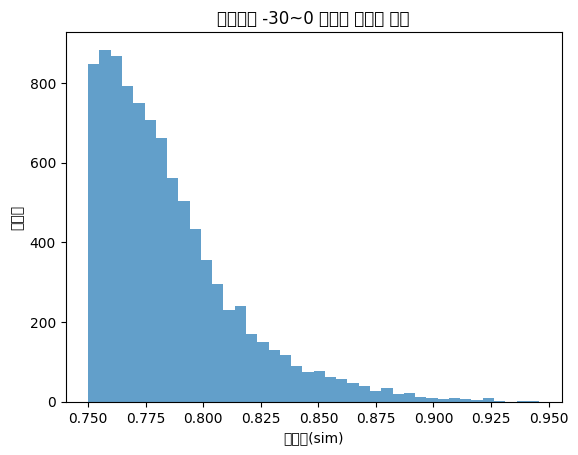

In [ ]:
mask = (sorted_df['date_diff_days'] >= -30) & (sorted_df['date_diff_days'] <= 0)
plt.hist(sorted_df.loc[mask, 'sim'], bins=40, alpha=0.7)
plt.xlabel("유사도(sim)")
plt.ylabel("빈도수")
plt.title("날짜차이 -30~0 구간의 유사도 분포")
plt.show()

<ipython-input-70-f8926d77e939>:17: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-70-f8926d77e939>:17: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-70-f8926d77e939>:17: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-70-f8926d77e939>:17: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-70-f8926d77e939>:17: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-70-f8926d77e939>:17: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input

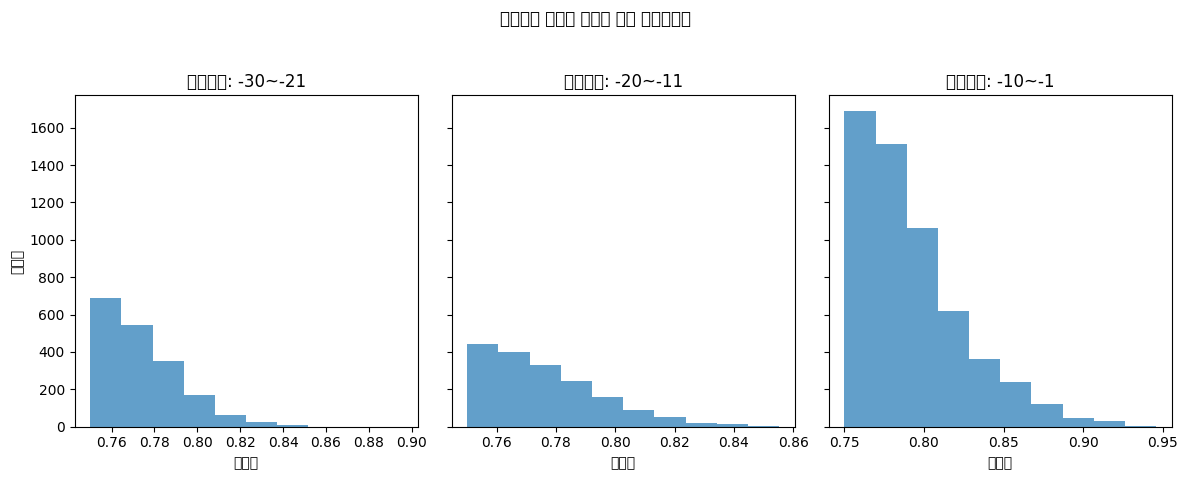

In [ ]:
import numpy as np

# 예: 날짜차이 -30 ~ 0을 10일 단위로 나눔
bins = np.arange(-30, 1, 10)
labels = [f"{b}~{b+9}" for b in bins[:-1]]
sorted_df['date_bin'] = pd.cut(sorted_df['date_diff_days'], bins=bins, labels=labels, include_lowest=True, right=True)

fig, axes = plt.subplots(1, len(labels), figsize=(4*len(labels), 5), sharey=True)
for idx, label in enumerate(labels):
    subset = sorted_df[sorted_df['date_bin'] == label]['sim']
    axes[idx].hist(subset, bins=10, alpha=0.7)
    axes[idx].set_title(f"날짜차이: {label}")
    axes[idx].set_xlabel("유사도")
    if idx == 0:
        axes[idx].set_ylabel("빈도수")
plt.suptitle("날짜차이 구간별 유사도 분포 히스토그램")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 혜진이 전달용 merge

In [ ]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58405 entries, 0 to 58404
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news_id    58405 non-null  object
 1   wdate      58405 non-null  object
 2   title      58405 non-null  object
 3   article    58405 non-null  object
 4   press      58405 non-null  object
 5   url        58405 non-null  object
 6   image      58405 non-null  object
 7   embedding  58405 non-null  object
dtypes: object(8)
memory usage: 3.6+ MB


In [ ]:
report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17310 entries, 0 to 17309
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   report_id  17310 non-null  object
 1   종목명        17310 non-null  object
 2   제목         17310 non-null  object
 3   증권사        17310 non-null  object
 4   작성일        17310 non-null  object
 5   조회수        17310 non-null  int64 
 6   URL        17310 non-null  object
 7   본문         17310 non-null  object
 8   목표가        14525 non-null  object
 9   투자의견       17310 non-null  object
 10  embedding  17310 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.5+ MB


In [ ]:
filtered_top3_sim_30_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   news_id         14605 non-null  object        
 1   wdate           14605 non-null  datetime64[ns]
 2   news_title      14605 non-null  object        
 3   news_content    14605 non-null  object        
 4   report_id       14605 non-null  object        
 5   작성일             14605 non-null  datetime64[ns]
 6   report_title    14605 non-null  object        
 7   report_content  14605 non-null  object        
 8   sim             14605 non-null  float32       
 9   date_diff_days  14605 non-null  int64         
 10  sim_bin         14605 non-null  category      
 11  sim_bin_05      14605 non-null  category      
 12  종목명             14605 non-null  object        
dtypes: category(2), datetime64[ns](2), float32(1), int64(1), object(7)
memory usage: 1.2+ MB


In [ ]:
filtered_top3_sim_30_df_merge = filtered_top3_sim_30_df.merge(
    report_df[['report_id', '증권사', '조회수', 'URL', '목표가', '투자의견']],
    on='report_id',
    how='left'
)

In [ ]:
filtered_top3_sim_30_df_merge.head()

,news_id,wdate,news_title,news_content,report_id,작성일,report_title,report_content,sim,date_diff_days,sim_bin,sim_bin_05,종목명,증권사,조회수,URL,목표가,투자의견
0,20240102_0083,2024-01-02 15:23:00,"한국비엔씨, 美메조테라피 필러 6종 품목 위탁생산 계약 ""101억원 규모""",2022년 연결기준 매출액의 24%\n[파이낸셜뉴스] 한국비엔씨는 2일 미국 ‘AB...,20231219_0003,2023-12-19,IPO 주관사 업데이트,국내 의약품 품질 관리 서비스 기관\n에스엘에스바이오는 의약품 품질검사를 주된 사업...,0.755533,14,0.7~0.8,0.75~0.8,에스엘에스바이오,하나증권,1458,https://finance.naver.com/research/company_rea...,NaN,없음
1,20240102_0137,2024-01-02 13:44:00,에셋플러스운용 “AI가 이끌 ‘파괴적 혁신’이 화두” [신년사],“중국은 파괴적 구조조정 겪는 중”\n양인찬 에셋플러스자산운용 대표 / 사진=뉴시스...,20240109_0005,2024-01-09,"한컴그룹, AI 사업자로의 진화 중. 목표주가 ..","I. M&A, 지분투자 등으로 AI 사업자로 진화 중\n최근(01/07), 한글과컴...",0.751956,-7,0.7~0.8,0.75~0.8,한글과컴퓨터,유진투자증권,8434,https://finance.naver.com/research/company_rea...,"29,000",Buy
2,20240102_0157,2024-01-02 11:53:00,신작 보릿고개 넘긴 넷마블…올해 구원투수는 '성진우',/사진=나혼자만레멜업 트레일러 영상.\n지난 2년 간 침체의 터널을 지나온 넷마블이...,20231220_0008,2023-12-20,글로벌 및 P&E 게임 라인업 지속 확대,"유연한 라이브 개발 역량 보유\n밸로프는 2007년 설립, 2022년 10월 코스닥...",0.776418,13,0.7~0.8,0.75~0.8,밸로프,교보증권,1432,https://finance.naver.com/research/company_rea...,NaN,없음
3,20240102_0193,2024-01-02 10:55:00,"엔케이맥스, 美 알츠하이머 임상 첫 환자 투약 완료",엔케이맥스는 관계사 엔케이젠바이오텍(NKGen Biotech)이 미국에서 진행하는 ...,20240110_0031,2024-01-10,강력한 신규 모멘텀 확보 (feat. 로어시비빈..,"세계 최초의 근본적 골관절염 치료제로 개발중인 ‘로어시비빈트’, 임상 3상 성공\n...",0.754840,-8,0.7~0.8,0.75~0.8,삼일제약,SK증권,3381,https://finance.naver.com/research/company_rea...,NaN,없음
4,20240102_0207,2024-01-02 10:45:00,"""블랙핑크 그룹 활동만?""…와이지엔터 투심도 '흔들'","블랙핑크 그룹 활동만 연장…와이지엔터 5%대 하락세\n베이비 몬스터, 성장 동력…흥...",20231207_0008,2023-12-07,"블랙핑크 그룹 재계약 완료, 최대 악재 소멸","블랙핑크 그룹 전속 계약 체결, 실적 상∙하방 모두 커버\n12/6 블랙핑크 멤버 ...",0.765706,26,0.7~0.8,0.75~0.8,와이지엔터테인먼트,키움증권,2201,https://finance.naver.com/research/company_rea...,"85,000",Buy


In [ ]:
len(filtered_top3_sim_30_df_merge)

14605

In [ ]:
filtered_top3_sim_30_df_merge.to_csv('filtered_top3_sim_30_df_merge.csv', index=False)